# 기계학습 final

김보람  
2022-12-14

### 기계학습특강 기말고사

In [ ]:
import torch 
from fastai.text.all import *

In [ ]:
df = pd.read_csv('/content/Corona_NLP_train.csv',encoding="ISO-8859-1")
df

In [ ]:
# 텍스트 분석
# 1단계 : TextDataLoaders
# 2단계 : language_model_learner()
# 3단계 : lrnr.fit()
# 4단계 : lrnr.predict()

df = pd.read_csv('Corona_NLP_train.csv',encoding="ISO-8859-1")
df

In [ ]:
TextDataLoaders?

In [ ]:
dls = TextDataLoaders.from_df(df,text_col='OriginalTweet',is_lm=True, seq_len=64)

In [ ]:
dls.show_batch()

In [ ]:
lrnr = language_model_learner(dls,AWD_LSTM,metrics=[accuracy,Perplexity()])

In [ ]:
lrnr.fine_tune(3,1e-1) 

In [ ]:
lrnr.predict('the price of',20) 

# 2. COVID10 tweets -\> 분류

In [ ]:
df = pd.read_csv('Corona_NLP_train.csv',encoding="ISO-8859-1")
df

In [ ]:
dls = TextDataLoaders.from_df(df,text_col='OriginalTweet', label_col='Sentiment', seq_len=64)
dls.show_batch()

In [ ]:
lrnr = text_classifier_learner(dls,AWD_LSTM,metrics=accuracy)

In [ ]:
lrnr.fine_tune(5, 1e-2)

In [ ]:
lrnr.predict("the government’s approach to the pendemic has been a complete disaster") 

In [ ]:
lrnr.predict("the new vaccines hold the promise of a quick return to economic growth") 

# 3. human numbers 5

In [ ]:
txt = (['one',',','two',',','three',',','four',',','five',',']*100)[:-1]
mapping = {',':0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5} 
txt_x = txt[:-1]
txt_y = txt[1:] 

In [ ]:
txt_x[:5], txt_y[:5]

In [ ]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()

In [ ]:
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

In [ ]:
 #torch.nn.RNNCell()을 이용하여 다음단어를 예측하는 신경망을 설계하고 학습하라.

In [ ]:
torch.manual_seed(202250926)
rnncell = torch.nn.RNNCell(6,8).to("cuda:0")
linr = torch.nn.Linear(8,6).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnncell.parameters())+list(linr.parameters()),lr=0.1)

In [ ]:
for epoc in range(100):
    ## 1
    hidden = [] 
    ht = torch.zeros(8).to("cuda:0")
    for xt,yt in zip(x,y): 
        ht = rnncell(xt,ht) 
        hidden.append(ht) 
    hidden = torch.stack(hidden)
    output = linr(hidden)
    ## 2 
    loss = loss_fn(output,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
yhat = soft(output)
yhat[:10].to("cpu").detach().numpy().round(3)

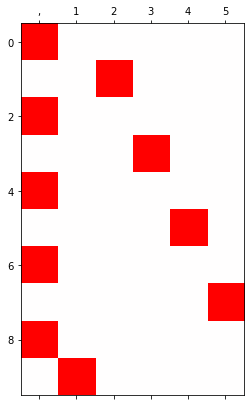

In [ ]:
plt.matshow(yhat.to("cpu").data[:10],cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(6),labels=[',','1','2','3','4','5']);

In [ ]:
# torch.nn.RNN()을 이용하여 다음단어를 예측하는 신경망을 설계하고 학습하라.
rnn = torch.nn.RNN(6,8).to("cuda:0")
linr = torch.nn.Linear(8,6).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)

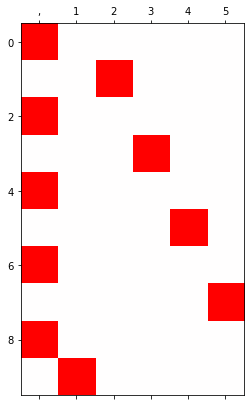

In [ ]:
for epoc in range(100):
    ## 1
    hidden, hT = rnn(x) 
    output = linr(hidden)
    ## 2
    loss = loss_fn(output,y)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
yhat=soft(output)    
plt.matshow(yhat.to("cpu").data[:10],cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(6),labels=[',','1','2','3','4','5']);

In [ ]:
#  torch.nn.LSTMCell()을 이용하여 다음단어를 예측하는 신경망을 설계하고 학습하라.
torch.manual_seed(202250926) 
lstmcell = torch.nn.LSTMCell(6,8).to("cuda:0")
linr = torch.nn.Linear(8,6).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstmcell.parameters())+list(linr.parameters()),lr=0.1)

In [ ]:
for epoc in range(100):
    ## 1
    hidden = []
    ht = torch.zeros(8).to("cuda:0")
    ct = torch.zeros(8).to("cuda:0")
    for xt,yt in zip(x,y): 
        ht,ct = lstmcell(xt,(ht,ct))
        hidden.append(ht) 
    hidden = torch.stack(hidden)
    output = linr(hidden)
    ## 2 
    loss = loss_fn(output,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
yhat = soft(output)
yhat[:10].to("cpu").detach().numpy().round(3)

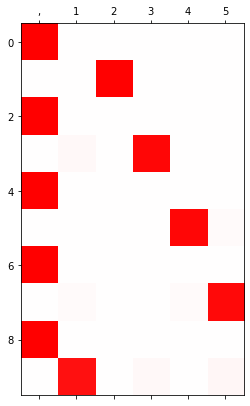

In [ ]:
plt.matshow(yhat.to("cpu").data[:10],cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(6),labels=[',','1','2','3','4','5']);

In [ ]:
# torch.nn.LSTM()을 이용하여 다음단어를 예측하는 신경망을 설계하고 학습하라.
lstm = torch.nn.LSTM(6,8).to("cuda:0")
linr = torch.nn.Linear(8,6).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

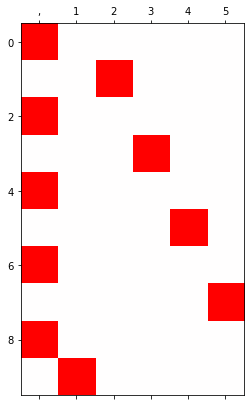

In [ ]:
for epoc in range(100):
    ## 1
    hidden, (hT,cT) = lstm(x)
    output = linr(hidden)
    ## 2
    loss = loss_fn(output,y)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
yhat=soft(output)    
plt.matshow(yhat.to("cpu").data[:10],cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(6),labels=[',','1','2','3','4','5']);